<a href="https://colab.research.google.com/github/ethantlogan/FWE_458/blob/main/Homework7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#Import all the tools I will need
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

#Load the dataset
iris = load_iris()

#Convert the dataset to a DataFrame using pandas
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

#Read the dataframe to add a target variable for the binary computation I want
#to do later
df['species'] = iris.target

#Then map target numbers to species names to make the variables have a
#digit associated instead of a name
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

#Then make a copy of the species column to use later
df['species_detailed'] = df['species']

#After I want to replace the two not setosa species with "not Setosa" to make it
#binary
dic_setosa = {'versicolor': 'not Setosa', 'virginica': 'not Setosa', 'setosa': 'Setosa'}
data = df.replace({"species": dic_setosa})
#Then use value counts to see how many setosas vs not setoasas there are and to
#confirm the data is binary
data['species'].value_counts()

,count
species,
not Setosa,100
Setosa,50


In [15]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species', 'species_detailed'],
      dtype='object')

In [20]:
#Importing a tool to split the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

#Define features into a dataframe without the two columns about species
#Define lfabels into the data just on species
features = data.drop(columns=['species', 'species_detailed'])
labels = data['species']

#I used the label binarizer from sklearn
#before ['Setosa', 'Not Setosa', 'Not Setosa']
#after [1,0,0]
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

#Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

#This is to reshape y_train to a 1-dimensional array in order for the ROC curve
#to work
#ravel makes the multi-dimensional array into a single dimension so later
#calculations and graphs can handle the data
y_train = y_train.ravel()

Confusion Matrix:
[[19  0]
 [ 0 26]]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


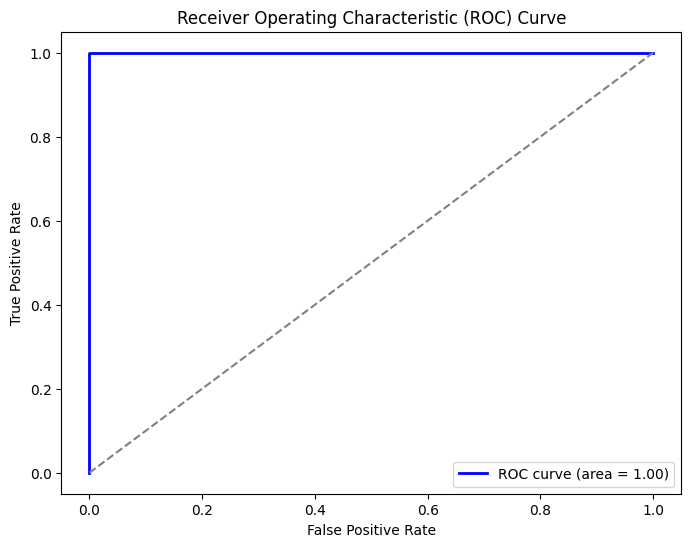

AUC Score: 1.00


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

#This defines the model that will use logistic regression to train the model
clf_setosa = LogisticRegression(random_state=42)
#This fits the logistic regression curve
clf_setosa.fit(X_train, y_train)

#This creates y predictions using the X data from the testing portion
y_test_pred = clf_setosa.predict(X_test)

#This generates a confusion matrix comparing the computed test values vs the
#prediction values
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)

#These all calculate accuracy, precision, recall, and F1-score using tools
#built into sk.learn
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

#This just creates labels and prints the values calculated for each score
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

#This plots the ROC curve using the false positive rate and true positive rate
#to create the curve using the y prediction values
fpr, tpr, thresholds = roc_curve(y_test, clf_setosa.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

#All of this just customizes the figure
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#THis outputs the AUC score
print(f"AUC Score: {roc_auc:.2f}")

An ROC curve plot shows the tradeoff between true positive rate vs false positive rate, and uses the the area under curve value to summarize the ROC curve. ROC curves allow for distinguishing between two groups and rating how different tests perform. A higher AUC value means the model was a better predictor for seperation of binary values, 0.5 is guessing. Since the area under the curve for this model was 1.00, this means the model perfectly sorted the data and was able to distinguish between setosa and not setosa data points every time. This can also be shown by the ROC curve going straight up at 0.0 false positive values, and going all the way to 1.0 true positive values, meaning all values estimated by the model were true positive values, and there were no false positives detected in the testing stage.

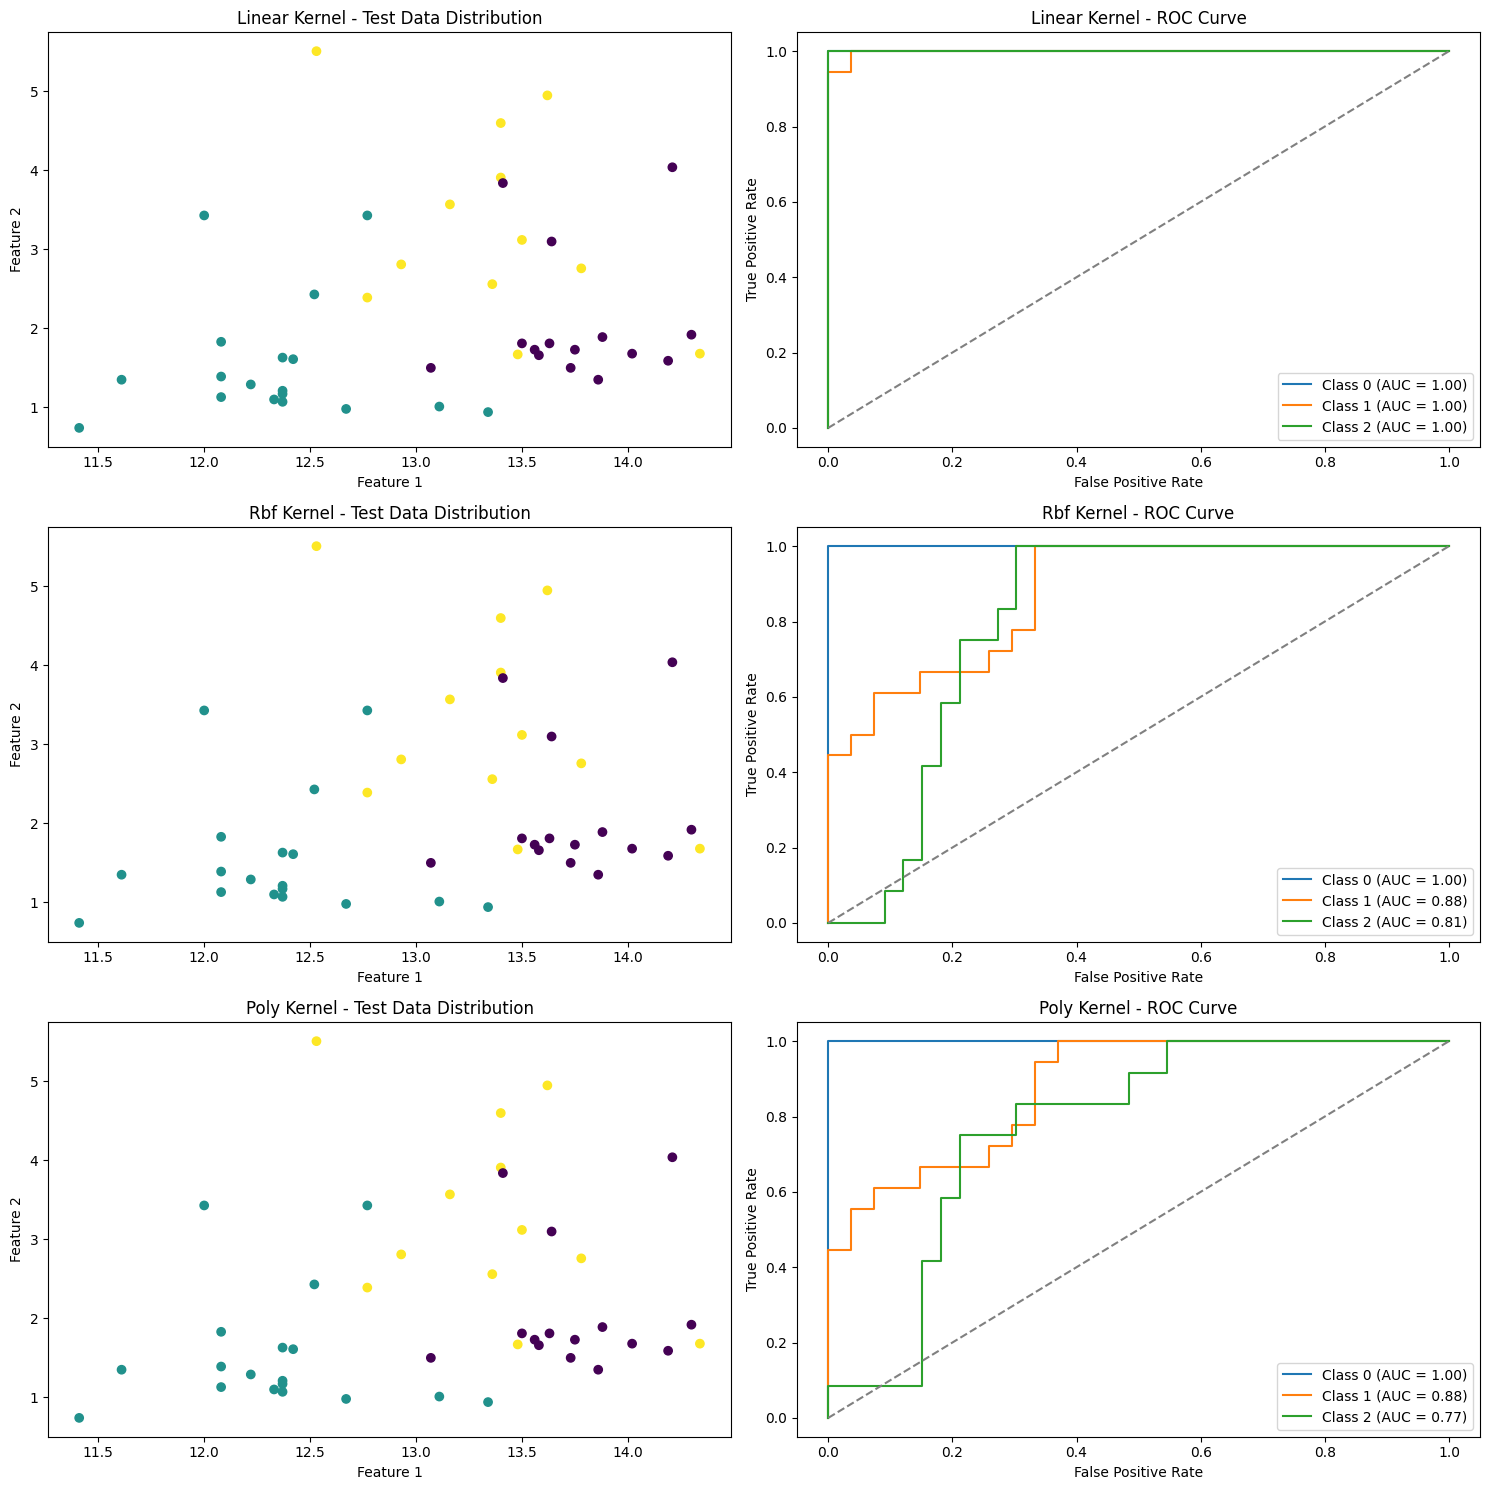


Linear Kernel:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-Score: 0.98

Rbf Kernel:
Accuracy: 0.71
Precision: 0.70
Recall: 0.71
F1-Score: 0.70

Poly Kernel:
Accuracy: 0.76
Precision: 0.75
Recall: 0.76
F1-Score: 0.70


In [2]:
#Import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

#This loads the Wine dataset and creates variables for the target data
wine = load_wine()
X = wine.data
y = wine.target

#This splits the dataset into training (75%) and testing (25%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#I used this to initialize SVM models with different kernels (linear, radial
#basis function, and polynomial)
kernels = ['linear', 'rbf', 'poly']
models = {}
#This creates a for loop for all of the different kernel models to make them
#All be fit to the SVC model and trained with the right data
for kernel in kernels:
    models[kernel] = SVC(kernel=kernel, probability=True, random_state=42)
    models[kernel].fit(X_train, y_train)

#This initializes the plot to creates the figures and all of the subplots
#for the three types of kernel plots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

#This prepares for evaluating the kernel models
#Using enumerate lets me keep track of the number of iterations done
metrics = {}
for i, kernel in enumerate(kernels):
    model = models[kernel]

    #First I create a scatterplot of all the data and customize the graph
    ax1 = axes[i, 0]
    scatter = ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='o')
    ax1.set_title(f'{kernel.capitalize()} Kernel - Test Data Distribution')
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')

    #Second I create an ROC curve using binary data from all 3 classes, to
    #compare all 3 to each other binarily. It's easier to compare 1 class to
    #all other classes 3 times, then compare all 3 at the same time
    ax2 = axes[i, 1]
    y_score = model.predict_proba(X_test)
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

    #Third I compute the ROC curve and AUC for each class using a One-vs-Rest
    #method which compares 1 "class" to the rest of the classes in the dataset.
    #Then I create plots for each of the ROC curves uisng fpr and tpr to
    #determine the ROC curve and the AUC
    fpr, tpr, _ = roc_curve(y_test_bin[:, 0], y_score[:, 0])  #Class 0
    auc_score = auc(fpr, tpr)
    ax2.plot(fpr, tpr, label=f'Class 0 (AUC = {auc_score:.2f})')

    fpr, tpr, _ = roc_curve(y_test_bin[:, 1], y_score[:, 1])  #Class 1
    auc_score = auc(fpr, tpr)
    ax2.plot(fpr, tpr, label=f'Class 1 (AUC = {auc_score:.2f})')

    fpr, tpr, _ = roc_curve(y_test_bin[:, 2], y_score[:, 2])  #Class 2
    auc_score = auc(fpr, tpr)
    ax2.plot(fpr, tpr, label=f'Class 2 (AUC = {auc_score:.2f})')

    #This then creates the graphs for the AUC and ROC curve and customizes
    #the graph to make it more appearling and give correct axes labels and
    #create a legend to be able to compare all 3 classes in each of the
    #kernel methods
    ax2.plot([0, 1], [0, 1], linestyle='--', color='gray')
    ax2.set_title(f'{kernel.capitalize()} Kernel - ROC Curve')
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.legend(loc='lower right')

    #I then evaluate the model and print all of the metrics for each model
    y_pred = model.predict(X_test)
    metrics[kernel] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1_score': f1_score(y_test, y_pred, average='weighted')
    }

#This is to show all of the plots and make sure they are all neat and even
#with no overlap using the tight_layout
plt.tight_layout()
plt.show()

#This prints the evaluation results for each model using a for loop to make the
#repetitve task easier
for kernel, metric in metrics.items():
    print(f"\n{kernel.capitalize()} Kernel:")
    print(f"Accuracy: {metric['accuracy']:.2f}")
    print(f"Precision: {metric['precision']:.2f}")
    print(f"Recall: {metric['recall']:.2f}")
    print(f"F1-Score: {metric['f1_score']:.2f}")


The kernel "trick" used to make all to make all of these models has to do with projecting the data into a higher dimension so that the data can be seperated into their distinct categories and a seperating hyperplane is easier to find. Since all of these models use the kernel trick, you can then look at the metrics to determine which model performed the best using the kernel. The linear kernel model appears to perform the best, meaning the data once projected into a higher dimension was easily seperatable by a linear projection line, meaning the data is relatively simple for a model to use and predict with. The radial basis function (RBF) performed the worst out of the 3 models. RBF's work by measuring the distance between input and a fixed center, meaning that the distance between the points and the "center" created by the RBF model were not the most telling of statistics that could be measured, and distance is not the most accurate measurement to seperate the categories. The polynomial kernel model is best used if there are higher order relationships in the data, and uses polynomial functions to distinguish boundaries. It's useful when the data cannot be seperated with a linear line, but still shows patterns. Since the linear model worked really well with the data, the polynomial function could've been expected to not work as well.